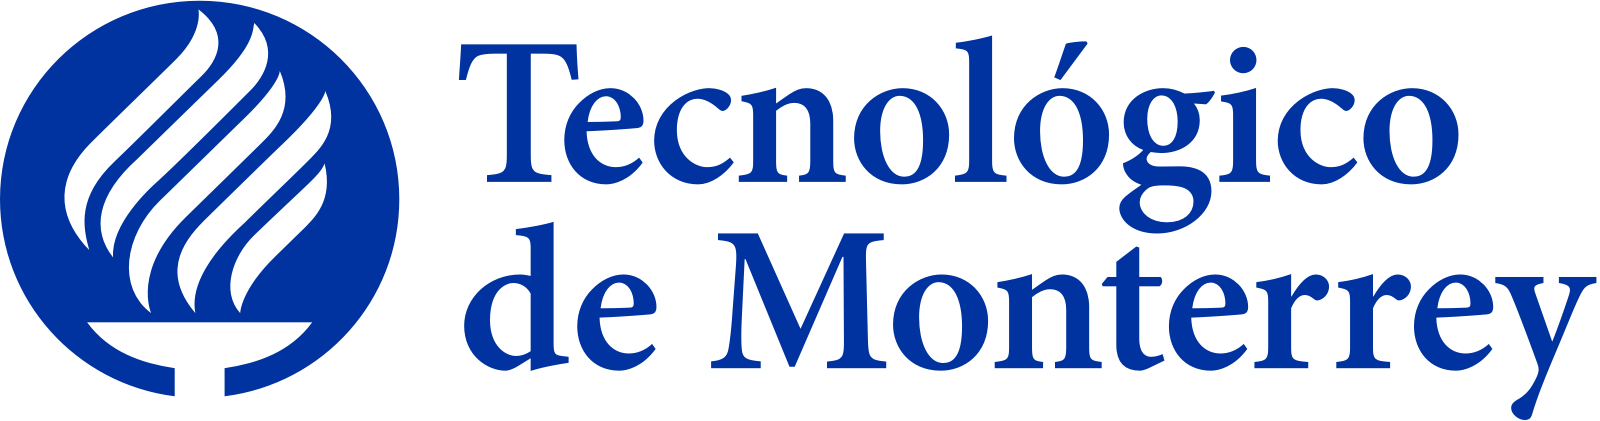

#**Maestría en Inteligencia Artificial Aplicada**

**Asignatura:** Ciencia y analítica de datos

**Profesor Titular:** Jobish Vallikavungal Devassia - María de la Paz Rico Fernández

**Tema:** K Means

**Semana:** Semana Ocho - Actividad semanal

**Estudiante:** 
* Henry Junior Aranzales Lopez - Matrícula: A01794020

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 15.8 MB/s 
     |████████████████████████████████| 1.0 MB 38.3 MB/s 
     |████████████████████████████████| 1.7 MB 35.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 50.6 MB/s 
     |████████████████████████████████| 6.3 MB 51.5 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=dc99946ab6e59ea87e266fa79828cf72893c5b5574aac636ee22640029ea3076
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=dddde5e92035f93425b71d3f97e7b7e092497882a8cddd36daf6c58020396f5d
  Stored in directory: /root/

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

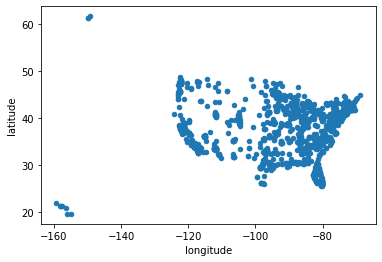

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

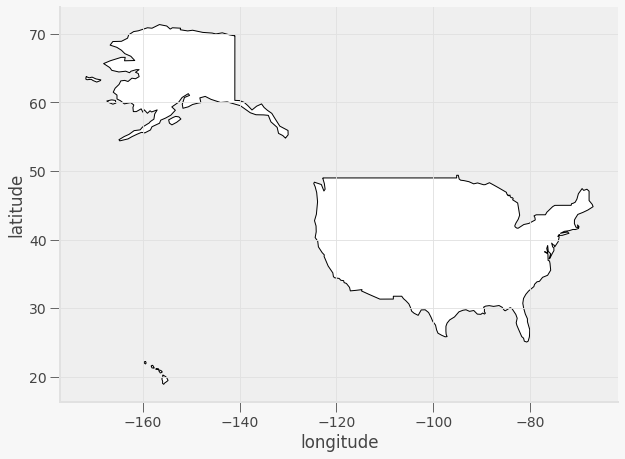

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

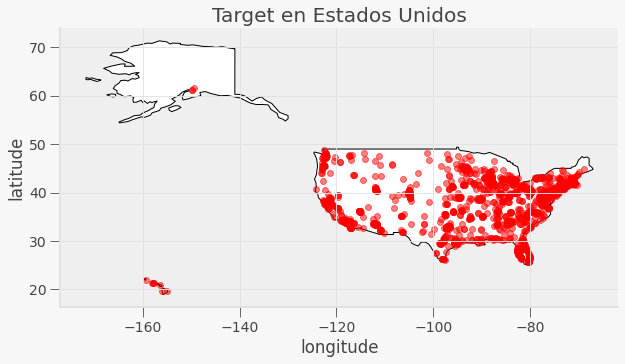

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [17]:
#Importamos las librerías requeridas
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.metrics import pairwise_distances_argmin_min

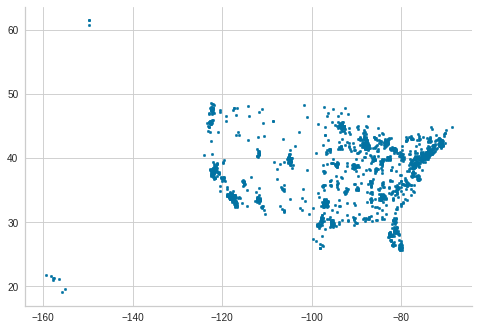

In [18]:
#Capturamos las coordenadas a través de la longitud y latitud
Coordenadas = list(zip(df.longitude, df.latitude))
Centro_Blobs = Coordenadas

#Utilizamos la función make_blobs para visualizar graficamente la distribución actual de las tiendas
X, y_true = make_blobs(n_samples=1839, centers=Centro_Blobs, cluster_std=0.20, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=7);

***************************************************************
El valor óptimo de 'K' según el visualizador Elbow es: 5
***************************************************************


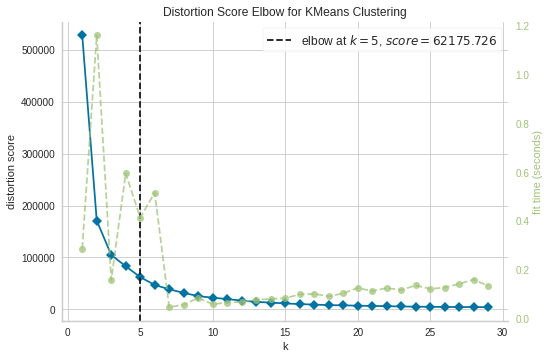

In [19]:
#Instanciamos nuestro modelo KMeans
Modelo_KMeans=KMeans()

#Instanciamos nuestro objeto visual utilizando el visualizador Kelbow, este nos mostrará en el codo de la línea azul el número óptimo de clusters
#para el modelo KMeans utilizado. En mi caso indicaré un rango de valores K que va desde 1 hasta 30.
Modelo_Visual = KElbowVisualizer(Modelo_KMeans, k=(1,30))
Modelo_Visual.fit(X)

#Obtenemos el mejor valor K según el visualizador
print("***************************************************************")
print("El valor óptimo de 'K' según el visualizador Elbow es:", Modelo_Visual.elbow_value_)
print("***************************************************************")

Modelo_Visual.show()

Se aprecia que para el score 'distortion', que es la métrica por defecto para el visualizador Elbow nos indica que el número óptimo de clusters para KMean es 5.

Ahora con el valor óptimo de 'K' (5) obtenido con el visualizador Elbow ejecutaremos el algoritmo KMeans, de tal forma que podamos entrenar el modelo generando las predicciones requeridas en aras de seleccionar las recomendaciones de las nuevas tiendas para Target

In [20]:
#Instanciamos nuestro modelo KMeans ideal utilizando el número de clusters que encontramos en la ejecución del visualizador Elbow.
Modelo_KMeans_Ideal = KMeans(n_clusters=Modelo_Visual.elbow_value_, random_state=42)
#Realizamos nuestra predicción
y_new_tiendas = Modelo_KMeans_Ideal.fit_predict(X)
#Verificamos los clusters generados
Modelo_KMeans_Ideal.cluster_centers_

array([[ -88.39079138,   41.81345068],
       [-119.17278297,   37.58060859],
       [ -82.98128354,   31.08981689],
       [ -75.63503338,   40.31506512],
       [ -98.27591607,   34.43992606]])

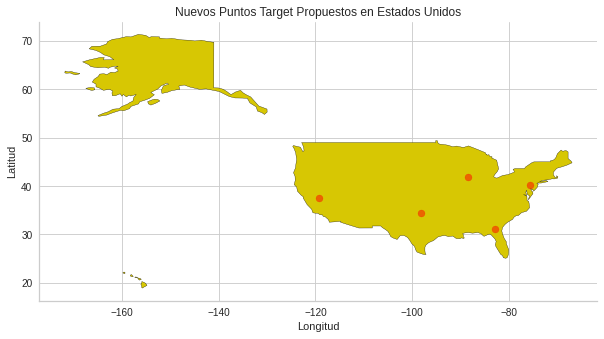

In [23]:
#Creamos un nuevo dataframe con las columnas de latitud y longitud para crear la nueva columna "Coordenadas", de tal manera que podamos graficar.
dfClusters = pd.DataFrame(Modelo_KMeans_Ideal.cluster_centers_, columns = ['Latitud','Longitud'])
dfClusters["Coordenadas"] = list(zip(dfClusters.Latitud, dfClusters.Longitud))
dfClusters["Coordenadas"] = dfClusters["Coordenadas"].apply(Point)
gdf = gpd.GeoDataFrame(dfClusters, geometry="Coordenadas")

fig, gax = plt.subplots(figsize=(10,10))

#Indicamos el país en el que utilizaremos las coordenadas del dataframe e indicamos que queremos colorear el mapa en color verde
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='y')

#Queremos visualizar los puntos de nuevas tiendas en rojo
gdf.plot(ax=gax, color='Red', alpha = 0.5)

#Ajustamos las etiquetas de los ejes
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Nuevos Puntos Target Propuestos en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

1. 
Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estara? ¿Cómo elegiste el numero de almacenes?, justifica tu respuesta tecnicamente?

In [24]:
#Imprimimos la información almacenada en el cluster según los hallazgos del modelo KMeans ideal.
for i in range(len(dfClusters)):
    print("***********")
    print("Tienda", str(i+1) + ":")
    print("Latitud:", str(dfClusters.iloc[i]['Latitud']) + " - Longitud:", str(dfClusters.iloc[i]['Longitud']))

***********
Tienda 1:
Latitud: -88.39079137971156 - Longitud: 41.813450682249126
***********
Tienda 2:
Latitud: -119.17278297187282 - Longitud: 37.580608585006736
***********
Tienda 3:
Latitud: -82.98128353950088 - Longitud: 31.08981688864523
***********
Tienda 4:
Latitud: -75.6350333796743 - Longitud: 40.31506512311014
***********
Tienda 5:
Latitud: -98.2759160699751 - Longitud: 34.439926058831674


In [25]:
#Obtenemos las latitudes y longitudes de los almacenes más cercanos para los puntos identificados con el fin de contar con una referencia
#geográfica precisa. Pero teniendo en cuenta que la ciudad se encuentra dentro del campo de dirección "Address", debemos dividir la celda en
#varias columnas para extraer el valor de la ciudad.
dfDirecciones = df["address"].str.split(',',expand=True)
dfDirecciones.columns = ['Direccion', 'Ciudad', 'Estado', 'Telefono']
dfCiudades=dfDirecciones["Ciudad"].str.split(expand=True)
dfCiudades.drop([1, 2], axis=1, inplace=True)
dfCiudades=dfCiudades[0]

#Buscamos los puntos de venta cercanos según el modelo KMeans ideal previamente ejecutado.
Cercanos, _ = pairwise_distances_argmin_min(Modelo_KMeans_Ideal.cluster_centers_, X)

#Tomaremos como referencia las ciudades más cercanas a los puntos de venta encontrados.
C = 1
#Vamos a crear una nueva lista para almacenar las ciudades cercanas y validar los puntos a abastecer en la siguiente parte del ejercicio.
Ciudades_Propuestas=list()

for Registro in Cercanos:
    print("***********")
    print("Tienda", str(C) + ":")
    print("Ciudad:", dfCiudades[Registro])
    C = C + 1
    #Vamos adicionando los registros a la nueva lista para buscar las tiendas cercanas a abastecer según la ciudad.
    Ciudades_Propuestas.append(dfCiudades[Registro])

***********
Tienda 1:
Ciudad: Tacoma
***********
Tienda 2:
Ciudad: Vacaville
***********
Tienda 3:
Ciudad: Aurora
***********
Tienda 4:
Ciudad: Monaca
***********
Tienda 5:
Ciudad: Cheektowaga


In [26]:
#Con las ciudades identificadas, procederemos a buscar las tiendas ubicadas en estas para validar cuales se podrán surtir con los nuevos puntos
#de venta propuestos.
#Creamos un nuevo dataframe para asignarle la latitud, longitud y la cantidad que se predijo con el modelo KMeans.
dfUbicacionTiendasxCiudad =  pd.DataFrame(df)
#Eliminamos las columnas que no vamos a utilizar y dejamos solo la latitud y la longitud.
dfUbicacionTiendasxCiudad.drop(dfUbicacionTiendasxCiudad.iloc[:, 3:7],axis = 1, inplace=True)
dfUbicacionTiendasxCiudad.drop(dfUbicacionTiendasxCiudad.iloc[:, 0:1],axis = 1, inplace=True)
dfUbicacionTiendasxCiudad['Cantidad'] = y_new_tiendas
#Creamos el dataframe que contendrá los datos de las ciudades propuestas en el punto anterior agrupadas por tienda existente.
dfTiendasxCiudad =  pd.DataFrame()
dfTiendasxCiudad['Ciudades Propuestas']=Ciudades_Propuestas
dfTiendasxCiudad['Tiendas Atendidas x Ciudad']=dfUbicacionTiendasxCiudad.groupby('Cantidad').size()

print("*****************************************************************************************************************************")
print("A continuación se visualizan la cantidad de tiendas que serán atendidas por los puntos de venta propuestos según la ciudad:")
print("*****************************************************************************************************************************")

dfTiendasxCiudad

*****************************************************************************************************************************
A continuación se visualizan la cantidad de tiendas que serán atendidas por los puntos de venta propuestos según la ciudad:
*****************************************************************************************************************************


,Ciudades Propuestas,Tiendas Atendidas x Ciudad
0,Tacoma,419
1,Vacaville,368
2,Aurora,272
3,Monaca,483
4,Cheektowaga,297


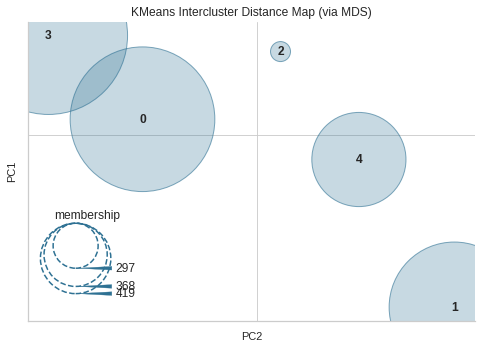

In [27]:
#Visualizamos la distancia entre los clusters identificados utilizando un visualizador "Intercluster Distance Map"
Visualizador_MDS = InterclusterDistance(Modelo_KMeans_Ideal)
#Ajustamos los datos en el visualizador
Visualizador_MDS.fit(y_new_tiendas)
#Graficamos los datos
Visualizador_MDS.show()

Con esta herramienta de visualización podemos observar gráficamente la distancia entre las tiendas propuestas, pero ahora veamos a través de una tabla la distancia entre estas nuevas tiendas y las existentes.

In [28]:
#Creamos un dataframe llamada "Distancia Tiendas" en el que agregaremos los registros de todas las tiendas existentes y en el que calcularemos
#la distancia de las tiendas existentes con relación a las propuestas de acuerdo al resultado del modelo KMeans ideal.
dfDistanciaTiendas=pd.DataFrame(Modelo_KMeans_Ideal.transform(X).round(0))
dfDistanciaTiendas=dfDistanciaTiendas.set_axis(pd.DataFrame(Ciudades_Propuestas),axis=1)
dfDistanciaTiendas=dfDistanciaTiendas.set_axis(dfCiudades,axis=0)

print("******************************************************************************************************************")
print("A continuación se visualiza la distancia de las tiendas propuestas con los punto de venta existentes para Target:")
print("******************************************************************************************************************")

dfDistanciaTiendas

******************************************************************************************************************
A continuación se visualiza la distancia de las tiendas propuestas con los punto de venta existentes para Target:
******************************************************************************************************************


,"(Tacoma,)","(Vacaville,)","(Aurora,)","(Monaca,)","(Cheektowaga,)"
0,,,,,
Alabaster,32.0,3.0,36.0,44.0,21.0
Bessemer,9.0,23.0,16.0,21.0,5.0
Daphne,2.0,31.0,14.0,13.0,14.0
Decatur,30.0,5.0,34.0,42.0,19.0
Dothan,34.0,3.0,40.0,47.0,24.0
...,...,...,...,...,...
Waukesha,30.0,4.0,35.0,43.0,20.0
Waukesha,5.0,27.0,16.0,17.0,11.0
Casper,10.0,39.0,5.0,7.0,18.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4574: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self._engine


A través del método de clasificación no supervisado K-Means pudimos identificar el número ideal de tiendas a crear para Target en aras de optimizar los gastos de transporte, tiempos de entrega y disminución de costos, ya que al hacer uso de la herramienta de visualización Kelbow pudimos validar el número óptimo de clusters, esto debido a la agrupación que realizó el algoritmo minimizando las sumas de las distancias entre cada nodo (tienda) y el centro del grupo al que están asociados según sus características dentro del conjunto de datos. En mi caso le recomendaría a TARGET crear 5 puntos de venta en las ciudades de Tacoma, Vacaville, Aurora, Monaca y Cheektowaga. 


Asímismo, con base a la sigueinte tabla podrían validar la distribución logística que deberían tener en cuenta con estos nuevos puntos de venta.

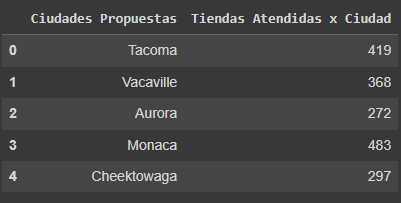



**¿qué librerías nos pueden ayudar a graficar este tipo de datos?**

Geopandas: es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en Python. GeoPandas extiende los tipos de datos utilizados por los pandas para permitir operaciones espaciales en tipos geométricos. Geopandas es muy útil cuando se trabaja con operaciones geométricas, además es de código abierto. Geopandas es muy útil en la visualización de datos geoespaciales, ya sea para ver mapas o incluso hacer personalizaciones de la visualización de los mapas.

GDAL/OGR: librería fundamental para procesar formatos de datos vectoriales (OGR) y ráster (GDAL). Muchos programas ya utilizan la librería de GDAL (PostGIS, R, Google Earth, entre otros), además la librería incluye varios programas de análisis, conversión, extracción y proyecciones. Dependiendo del proyecto en el que se trabaje esta librería podría ser la ideal.

PyProj: Esta librería también es de uso básico ya que permite proyectar y transformar coordenadas entre diferentes sistemas. Por lo tanto ayuda bastante cuando se necesita hacer operaciones con los datos. Además, ofrece funcionalidad para convertir las corrdenadas de un espacio referencial a otra con facilidad.

GeoPy: facilita a los desarrolladores de Python localizar las coordenadas de direcciones, ciudades, países y puntos de referencia en todo el mundo utilizando geocodificadores de terceros y otras fuentes de datos. Geopy es eficiente porque es una librería diseñada para geo-codificar los datos y tomar las coordenadas de las ubicaciones utilizando geocodigo externos. Ayuda mucho a la limpieza de los datos.

Cartopy: Esta librería permite dibujar mapas para que el análisis y la visualización de datos sea lo más intuitivo posible. Si se necesita realizar mapas y personalizarlos, cartopy es una buena opcion

**¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Sí es importante, ya que realizar este tipo de graficas en especifico para problemas en los que intervienen locaciones o ubicaciones, permite tener una vista mas amplia adecuada por medio de la visualzaición de los datos. 

El grafico de mapa nos arroja infromación que en una tabla simeplemente no severia de manera clara.  Los datos toman contexto y puntos que en un principio parecerían outliers rapidamente queda claro porque están localizados en esa ciudad o lugar geográfico.

CONCLUSIONES

Si bien hay distintos tipos de bases de datos debemos considerar el tipo de datos y el objetivo del ejercicio que se está realizando. En este caso pudimos trabajar con datos georgráficos. Es importante tomar en cuenta que los datos son georgráficos, ya que hay distintos factores a considerar al realizar el ejercicio (como la distancia, el mar, el tipo de transporte, la inversión, el tamaño de las bodega, la catidad de productos que se vendne en dichas bodegas, el riesgo de las mismas, etc). Los Kmenas son una herramienta muy poderosa, ya que podemos obtener los resultados internos del modelo, la inercia, los labels, la distancia de cada tienda a cada uno de los centroides.

Kmeans sirve para hacer clusters de datos de una manera muy práctica. Aquí en el ejercicio solamente usamos una métrica, la distancia euclidiana para crear nuestros clusters, sin embargo se puede utilizar más métricas en el análisis, como costo transportación, tamaño de las tienas, rentabilidad etc, para ver como cambiarían los resultados tanto en el número de almacenes como en la localización.